In [66]:
#Improtar las librerías
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#Descargo la base de datos de mi github
!wget https://github.com/LautaroOchotorena/Mental-Health-in-the-Tech-Industry-en-curso-/raw/main/mental_health.sqlite

#Crear la conexión y el cursor
con = sql.connect("mental_health.sqlite")
cursor = con.cursor()

--2023-12-08 05:32:12--  https://github.com/LautaroOchotorena/Mental-Health-in-the-Tech-Industry-en-curso-/raw/main/mental_health.sqlite
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LautaroOchotorena/Mental-Health-in-the-Tech-Industry-en-curso-/main/mental_health.sqlite [following]
--2023-12-08 05:32:12--  https://raw.githubusercontent.com/LautaroOchotorena/Mental-Health-in-the-Tech-Industry-en-curso-/main/mental_health.sqlite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5890048 (5.6M) [application/octet-stream]
Saving to: ‘mental_health.sqlite.2’

mental_health.sqlit 100%[================

In [68]:
#Mostrar los nombres de todas las tablas
cursor.execute("""SELECT name
FROM sqlite_master
WHERE type='table';""")
cursor.fetchall()

[('Answer',), ('Question',), ('Survey',)]

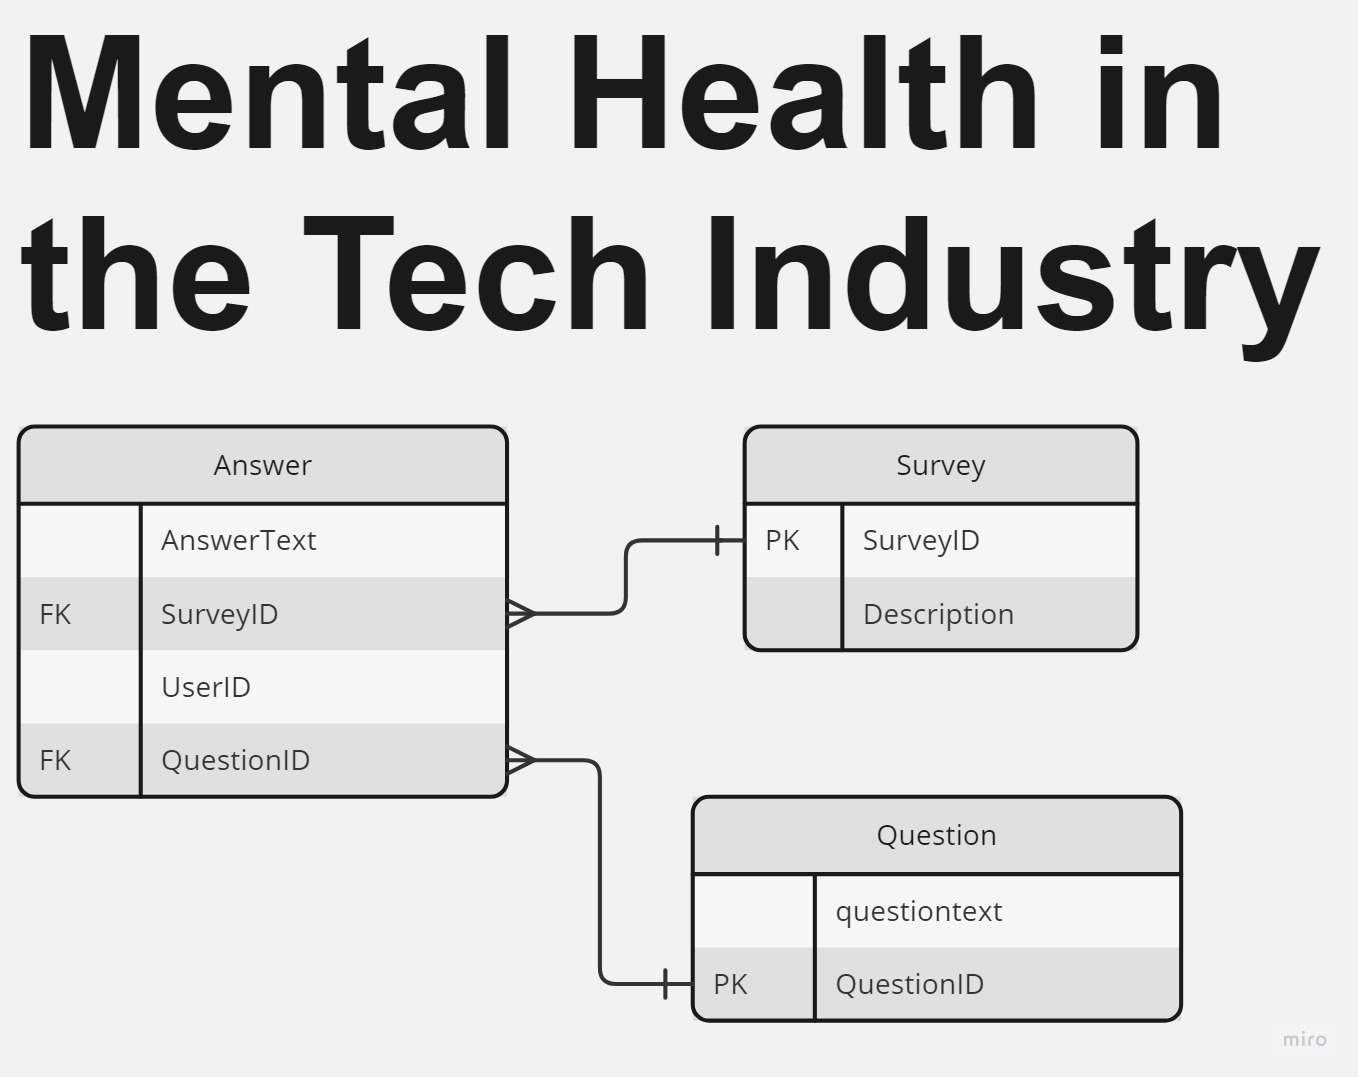

##1) Mostrar cada tabla

In [69]:
query = """
  select * from Answer
"""
answer = pd.read_sql_query(query,con)
answer.head()

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


In [70]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236898 entries, 0 to 236897
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   AnswerText  236898 non-null  object
 1   SurveyID    236898 non-null  int64 
 2   UserID      236898 non-null  int64 
 3   QuestionID  236898 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.2+ MB


In [71]:
query = """
  select * from Question
"""
question = pd.read_sql_query(query,con)

#Cambia la anchuera de las columnas para que se visualicen bien todas las preguntas
pd.set_option('display.max_colwidth', 1000)

question

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,114
101,"If yes, what condition(s) have you been diagnosed with?",115
102,"If maybe, what condition(s) do you believe you have?",116
103,Which of the following best describes your work position?,117


Las preguntas parecen indicar responder con un número positivo, con "Sí" o con "No".

In [72]:
query = """
  select * from Survey
"""
survey = pd.read_sql_query(query,con)
survey.head()

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


## 2) Cantidad total de personas encuestadas

In [73]:
#Cantidad total de personas encuestadas
#DISTINCT cuenta los UserId diferentes!
query = """
  select count (DISTINCT UserID) from Answer
"""
cursor.execute(query)
total_filas = cursor.fetchall()[0][0]
total_filas

4218

Se verá si hay ids repetidos juzgando si se respondieron más de una vez las preguntas

In [74]:
query = """
  select UserID, QuestionID, count(QuestionID) from Answer
  group by UserID, QuestionID
  having count(QuestionID)>1
"""
df = pd.read_sql_query(query,con)
df.head()

,UserID,QuestionID,count(QuestionID)
0,1262,115,2
1,1262,117,2
2,1264,115,2
3,1265,115,2
4,1265,117,7


In [75]:
# Cantidad de ids posiblemente repetidos
df.shape[0]

1190

In [76]:
# Ejemplo de Ids repetidos, repitió varias veces la pregunta 117
query = """
  select UserID, QuestionID from Answer
  where UserID==1265
  order by QuestionID
"""
df = pd.read_sql_query(query,con)
df

,UserID,QuestionID
0,1265,1
1,1265,2
2,1265,3
3,1265,4
4,1265,5
...,...,...
62,1265,117
63,1265,117
64,1265,117
65,1265,117


##3) Verificando que los valores son válidos

In [77]:
query = """
  select AnswerText from Answer
"""
cursor.execute(query)
#cuenta de los valores únicos de AnserText
len(np.unique(cursor.fetchall()))

4215

In [78]:
query = """
  select AnswerText from Answer where AnswerText==''
"""
cursor.execute(query)
cursor.fetchall()

[]

No hay datos vacíos

In [79]:
#Veamos las respuestas numéricas
query = """
  select AnswerText from Answer where CAST(AnswerText AS INTEGER) == AnswerText
"""
cursor.execute(query)
#valores únicos
a = np.sort(np.array(np.unique(cursor.fetchall()),dtype=int))
a

array([-29,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  15,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  70,  72,  74,  99, 323, 329])

Hay respuestas que a priori no tiene un sentido, por ejemplo el -29, -1, 99, 323 y 329. Veamos de qué preguntas provienen

In [80]:
query = """
  select QuestionID from Answer where AnswerText==-1
"""
cursor.execute(query)
#valores únicos del QuestionID
preguntas = np.unique(cursor.fetchall())
print(preguntas)

[  1   2   3   4   5   8   9  10  11  13  14  15  16  17  18  19  20  21
  23  24  25  26  27  28  31  32  34  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92 103 104
 105 106 107 108 109 110 111 112 115 116]


In [81]:
#hay que convertirlo en tupla para que sql entienda
query = f"""
  select questiontext from Question where QuestionID in {tuple(preguntas)}
"""
cursor.execute(query)
cursor.fetchall()

[('What is your age?',),
 ('What is your gender?',),
 ('What country do you live in?',),
 ('If you live in the United States, which state or territory do you live in?',),
 ('Are you self-employed?',),
 ('How many employees does your company or organization have?',),
 ('Is your employer primarily a tech company/organization?',),
 ('Does your employer provide mental health benefits as part of healthcare coverage?',),
 ('Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',),
 ('Is your primary role within your company related to tech/IT?',),
 ('Do you know the options for mental health care available under your employer-provided health coverage?',),
 ('Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',),
 ('Does your employer offer resources to learn more about mental health disorders and options for seeking help?

Como es incongruente la respuesta según la pregunta, se concluye que el -1 representa un dato faltante.

In [82]:
query = """
  select QuestionID from Answer where AnswerText==-29
"""
cursor.execute(query)
#valores únicos del QuestionID
preguntas = np.unique(cursor.fetchall())
print(preguntas)

[1]


In [83]:
#Ahora veamos qué preguntas son
query = """
  select questiontext from Question where QuestionID==1
"""
cursor.execute(query)
cursor.fetchall()

[('What is your age?',)]

-29 también represante un dato faltante

In [84]:
query = """
  select QuestionID from Answer where AnswerText==99
"""
cursor.execute(query)
#valores únicos del QuestionID
preguntas = np.unique(cursor.fetchall())
print(preguntas)

[1]


Alguien contestó que tiene 99 años de edad, ¿razonable? Supongamos que no.

In [85]:
query = """
  select QuestionID from Answer where AnswerText==323
"""
cursor.execute(query)
#valores únicos del QuestionID
preguntas = np.unique(cursor.fetchall())
print(preguntas)

[1]


Alguien contestó que tiene 323 años de edad, ¿razonable? No.

In [86]:
query = """
  select QuestionID from Answer where AnswerText==329
"""
cursor.execute(query)
#valores únicos del QuestionID
preguntas = np.unique(cursor.fetchall())
print(preguntas)

[1]


Alguien contestó que tiene 329 años de edad, ¿razonable? No.

#4) Eliminar datos no válidos

In [87]:
query = """
  Delete from Answer where AnswerText in (-29,-1,99,323,329)
"""
cursor.execute(query)
con.commit()

## 5) Porcentaje de respuestas numéricas y respuestas texto

In [88]:
#Veo el total de valores que son numéricos
query = """
  select count (AnswerText) from Answer where CAST(AnswerText AS FLOAT) == AnswerText
"""
cursor.execute(query)
total_numeros = cursor.fetchall()[0][0]
total_numeros

42187

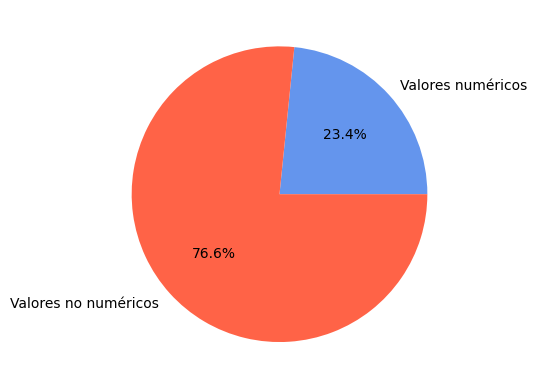

In [89]:
#Cantidad total de personas encuestadas
query = """
  select count (UserID) from Answer
"""
cursor.execute(query)
total_filas = cursor.fetchall()[0][0]
#Torta con porncentaje de respuestas numéricas vs respuestas no numéricas
total_no_numeros = total_filas - total_numeros
plt.pie([total_numeros, total_no_numeros], labels=['Valores numéricos','Valores no numéricos'], autopct='%1.1f%%', colors=['cornflowerblue','tomato'])
plt.show()

## 6) Frecuencia de los años

2016    88238
2017    57456
2014    32760
2018    31692
2019    26752
Name: SurveyID, dtype: int64


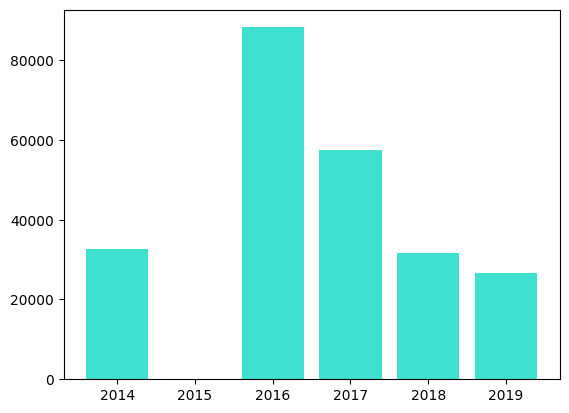

In [90]:
#Frecuencia de los años
index = pd.Index(answer['SurveyID'])
print(index.value_counts())

#Barplot
plt.bar(index.value_counts().index, index.value_counts(), color='turquoise')
plt.show()

No hay datos del 2015

## 7) Histograma de edades

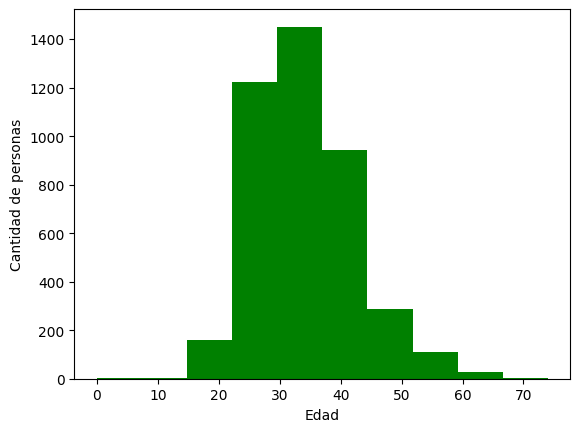

In [91]:
#Histograma de edades
query = """
  select AnswerText from Answer where QuestionID==1
"""
cursor.execute(query)
preguntas = pd.array(cursor.fetchall(),dtype=int)
plt.hist(preguntas, color='g')
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')
plt.show()

## 8) Diagrama de barras de género

In [92]:
#Diagrama de barras de género
query = """
  select AnswerText from Answer where QuestionID==2
"""
cursor.execute(query)
genero = [item[0] for item in cursor.fetchall()]
index = pd.Index(genero)
print(index.value_counts().index)

Index(['Male', 'Female', 'male', 'female', 'Nonbinary', 'non-binary',
       'Genderqueer', 'Agender', 'None', 'Genderfluid', 'Non-binary', 'Enby',
       'Trans man', 'Trans woman', 'agender', 'Female (trans)', 'Male-ish',
       'Other', 'Non binary', 'Agender trans woman', 'Female-ish',
       'Ostensibly Male', '43', 'Transfeminine', 'trans woman', 'masculino',
       '\-', 'Genderqueer demigirl', 'nonbinary', 'Genderqueer/non-binary',
       'femmina', 'I am a Wookie', 'Trans non-binary/genderfluid',
       'Contextual', 'Woman-identified', 'sometimes', 'MALE', 'transgender',
       'Male (or female, or both)', 'NB', 'I have a penis', 'Questioning',
       'Female-identified', 'Cishet male', 'Masculine',
       'gender non-conforming woman', 'Nonbinary/femme', 'SWM', 'rr',
       'She/her/they/them', 'Trans female', 'Agender/genderfluid', 'Demiguy',
       'genderfluid', 'Female/gender non-binary.', 'non binary', 'none',
       'Transgender woman', 'God King of the Valajar', 'Neut

Debido a la cantidad que hay se decide optar por encajarlos en 3 grupos: "Male", "Female" y "Non-binary". Si algunos no se consideran que pertenezcan a estas categorías entonces se eliminarán.

In [93]:
# Reemplazo de categorías
categorias = {
    'Male': [
        'Male', 'male', 'Masculine', 'Male-ish', 'masculino', 'Ostensibly Male',
        'Ostensibly male, unsure what that really means', 'MALE', 'Cishet male',
        'I have a penis', 'Male/genderqueer', 'male leaning androgynous',
        'Guy (-ish) ^_^', 'something kinda male?', 'Male (trans, FtM)'
    ],
    'Female': [
        'Female', 'female', 'Female (trans)', 'Female-ish', 'Trans woman', 'trans woman', 'femmina',
        'Female-identified', 'Trans female', 'Female assigned at birth',
        'Female or Multi-Gender Femme','Woman-identified',
        'Transgender woman', 'Female or Multi-Gender Femme', 'Transitioned, M2F', 'Trans-female'
    ],
    'Non-binary/various genders': [
        'Male (or female, or both)','male 9:1 female, roughly','Female/gender non-binary.','Female-bodied; no feelings about gender',
        'Nonbinary', 'non-binary', 'Genderqueer', 'Non-binary', 'Enby', 'Genderfluid', 'Agender', 'Genderqueer demigirl',
        'nonbinary', 'Genderqueer/non-binary', 'Trans non-binary/genderfluid',
        'Contextual', 'gender non-conforming woman',
        'Nonbinary/femme', 'She/her/they/them', 'Agender/genderfluid', 'Demiguy', 'non binary', 'Bigender', 'queer',
        'uhhhhhhhh fem genderqueer?', 'fluid', 'All', 'queer/she/they',
        'Genderfluid (born female)', 'Other/Transfeminine', 'Androgynous',
        'male/androgynous', 'Genderflux demi-girl', 'genderqueer', 'Non-binary and gender fluid'
    ]
}

Male                          3051
Female                        1036
Non-binary/various genders      52
dtype: int64


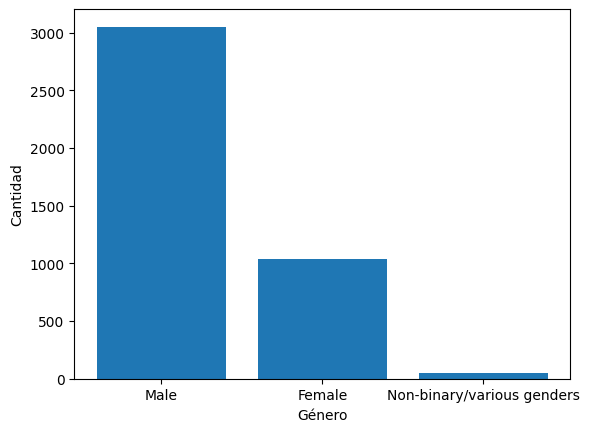

In [97]:
#Histograma de género
index = pd.Index(genero)
datos_reemplazados = [
    categoria for dato in index for categoria, terminos in categorias.items() if dato in terminos
]
index_nuevo = pd.Index(datos_reemplazados)
print(index_nuevo.value_counts())

#Barplot
plt.bar(index_nuevo.value_counts().index, index_nuevo.value_counts())
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

Mucha más proporción de hombres

## 9) ¿Cuál es la pregunta que más se hizo?

In [ ]:
#¿Cuál es la pregunta que más se hizo?
query = """
  select count(QuestionID) from Answer group by QuestionID
"""
cursor.execute(query)
cantidad_por_pregunta = np.array(cursor.fetchall())
loc_max = np.argmax(cantidad_por_pregunta)
#Se le suma 1 porque las id empiezan en 1
print('La pregunta que más se hizo es la número',loc_max+1)
print('Dicha pregunta es:',question.iloc[loc_max]['questiontext'])

La pregunta que más se hizo es la número 6
Dicha pregunta es: Do you have a family history of mental illness?


##10) Unificando las tablas

In [ ]:
#Unificando las tablas
query = """SELECT Answer.UserID, Survey.Description, Question.questiontext, Answer.AnswerText
FROM Answer
INNER JOIN Question ON Question.QuestionID=Answer.QuestionID
INNER JOIN Survey ON Survey.SurveyID=Answer.SurveyID
"""
df = pd.read_sql_query(query,con)
df.head()

,UserID,Description,questiontext,AnswerText
0,1,mental health survey for 2014,What is your age?,37
1,2,mental health survey for 2014,What is your age?,44
2,3,mental health survey for 2014,What is your age?,32
3,4,mental health survey for 2014,What is your age?,31
4,5,mental health survey for 2014,What is your age?,31


##11) Tabla de personas con menos de 30 años

In [ ]:
#Veamos la tabla de las personas con menos de 30 años
query = """SELECT UserID FROM Answer
where (QuestionID==1 and AnswerText <= 30)
"""
cursor.execute(query)
id_menos_30 = [item[0] for item in cursor.fetchall()]
df[df.UserID.isin(id_menos_30)]

,UserID,Description,questiontext,AnswerText
9,10,mental health survey for 2014,What is your age?,23
11,12,mental health survey for 2014,What is your age?,29
14,15,mental health survey for 2014,What is your age?,27
15,16,mental health survey for 2014,What is your age?,29
16,17,mental health survey for 2014,What is your age?,23
...,...,...,...,...
180287,2686,mental health survey for 2016,Which of the following best describes your work position?,DevOps/SysAdmin
180288,2686,mental health survey for 2016,Which of the following best describes your work position?,Dev Evangelist/Advocate
180289,2687,mental health survey for 2016,Which of the following best describes your work position?,Other
180294,2692,mental health survey for 2016,Which of the following best describes your work position?,DevOps/SysAdmin


## 12) Relación entre cantidad de empleados y cuidados de la salud mental en el trabajo

In [ ]:
#QuestionId = 8: How many employees does your company or organization have?
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==8
"""
cursor.execute(query)
cursor.fetchall()

[('6-25',),
 ('More than 1000',),
 ('26-100',),
 ('100-500',),
 ('1-5',),
 ('500-1000',)]

Hay 6 respuestas únicas, estan categorizadas ya

In [ ]:
#QuestionID=15 : Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==15
"""
cursor.execute(query)
cursor.fetchall()

[('No',), ('Yes',), ("I don't know",)]

In [ ]:
#Juntandolas en un dataframe
#Ayuda de ChatGPT
query = """SELECT
    Answer_8,
    Answer_15,
    COUNT(*) AS Count_Users
FROM (
    SELECT
        UserID,
        MAX(CASE WHEN QuestionID = 8 THEN AnswerText ELSE NULL END) AS Answer_8,
        MAX(CASE WHEN QuestionID = 15 THEN AnswerText ELSE NULL END) AS Answer_15
    FROM Answer
    WHERE QuestionID IN (8, 15)
    GROUP BY UserID
) AS Subquery
GROUP BY Answer_8, Answer_15
ORDER BY
    CASE Answer_8
        WHEN '1-5' THEN 1
        WHEN '6-25' THEN 2
        WHEN '26-100' THEN 3
        WHEN '100-500' THEN 4
        WHEN '500-1000' THEN 5
        WHEN 'More than 1000' THEN 6
    END;
"""
cursor.execute(query)
df = pd.read_sql_query(query,con)
df

,Answer_8,Answer_15,Count_Users
0,1-5,None,162
1,1-5,I don't know,5
2,1-5,No,72
3,1-5,Yes,15
4,6-25,None,290
5,6-25,I don't know,17
6,6-25,No,335
7,6-25,Yes,47
8,26-100,None,289
9,26-100,I don't know,28


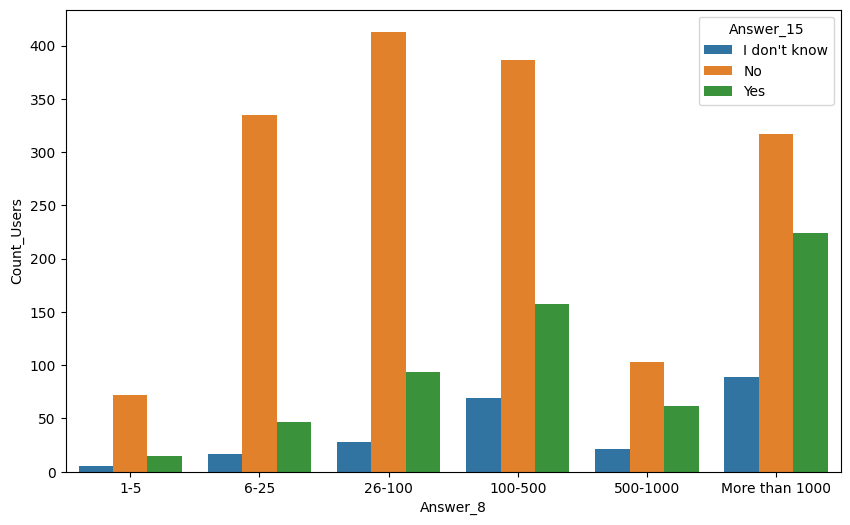

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Answer_8', y='Count_Users', hue='Answer_15')
plt.show()

Con más empleados se obtiene que, en comparación con el total de esa categoría, se discuten más las enfermedades mentales por parte de los empleadores

In [ ]:
#QuestionID=10 : Does your employer provide mental health benefits as part of healthcare coverage?
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==10
"""
cursor.execute(query)
cursor.fetchall()

[('Yes',),
 ("Don't know",),
 ('No',),
 ('Not eligible for coverage / NA',),
 ("I don't know",)]

In [ ]:
query = """SELECT
    Answer_8,
    Answer_10,
    COUNT(*) AS Count_Users
FROM (
    SELECT
        UserID,
        MAX(CASE WHEN QuestionID = 8 THEN AnswerText ELSE NULL END) AS Answer_8,
        MAX(CASE WHEN QuestionID = 10 THEN AnswerText ELSE NULL END) AS Answer_10
    FROM Answer
    WHERE QuestionID IN (8, 10)
    GROUP BY UserID
) AS Subquery
GROUP BY Answer_8, Answer_10
ORDER BY
    CASE Answer_8
        WHEN '1-5' THEN 1
        WHEN '6-25' THEN 2
        WHEN '26-100' THEN 3
        WHEN '100-500' THEN 4
        WHEN '500-1000' THEN 5
        WHEN 'More than 1000' THEN 6
    END;
"""
cursor.execute(query)
df = pd.read_sql_query(query,con)
df

,Answer_8,Answer_10,Count_Users
0,1-5,Don't know,32
1,1-5,I don't know,22
2,1-5,No,150
3,1-5,Not eligible for coverage / NA,16
4,1-5,Yes,34
5,6-25,Don't know,98
6,6-25,I don't know,117
7,6-25,No,243
8,6-25,Not eligible for coverage / NA,43
9,6-25,Yes,188


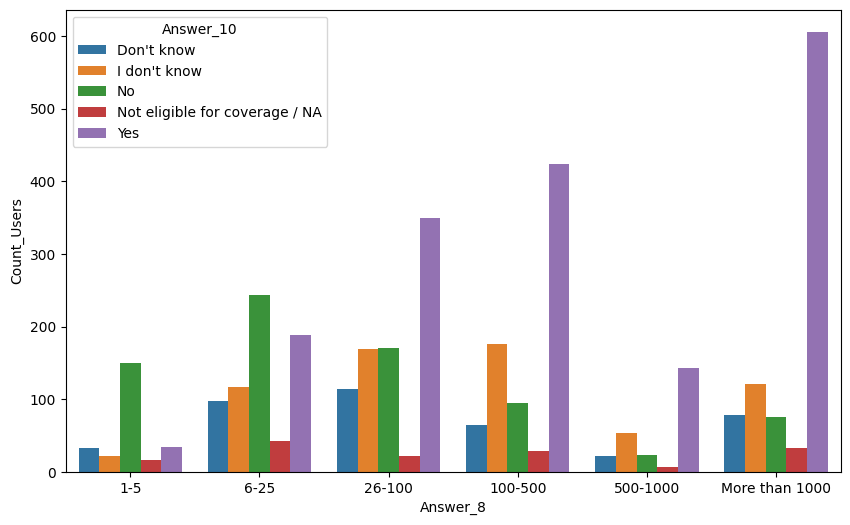

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Answer_8', y='Count_Users', hue='Answer_10')
plt.show()

Se nota que con más gente en la compañía involucra mayores cuidados a cerca de la salud mental

## 13) Relación entre edad y self-employed


In [ ]:
#QuestionID=5 : self-employed
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==5
"""
cursor.execute(query)
cursor.fetchall()

[('1',), ('0',)]

In [ ]:
query = """SELECT
    Answer_1,
    Answer_5
FROM (
    SELECT
        UserID,
        MAX(CASE WHEN QuestionID = 1 THEN CAST(AnswerText AS INTEGER) ELSE NULL END) AS Answer_1,
        MAX(CASE WHEN QuestionID = 5 THEN AnswerText ELSE NULL END) AS Answer_5
    FROM Answer
    WHERE QuestionID IN (1, 5)
    GROUP BY UserID
) AS Subquery
ORDER BY Answer_1
"""
cursor.execute(query)
df = pd.read_sql_query(query,con)
df

,Answer_1,Answer_5
0,NaN,0
1,NaN,0
2,NaN,1
3,NaN,0
4,NaN,1
...,...,...
4213,67.0,1
4214,67.0,1
4215,70.0,0
4216,72.0,0


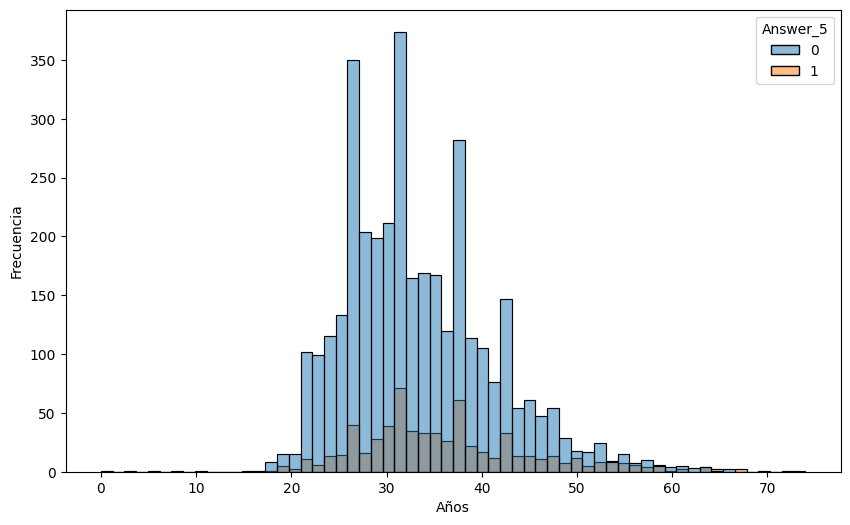

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Answer_1' , hue='Answer_5')
plt.ylabel('Frecuencia')
plt.xlabel('Años')
plt.show()

Primero que nada las respuestas de años antes de 16 años las descartaría como válidas. Hay más cantidad de gente que no es self-employed. Parecería que la mayoría no es self-employed y que a medida que se aumenta la edad la proporción  de éstos va ganando participación

## 14)

In [ ]:
#QuestionID=20: Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==20
"""
cursor.execute(query)
cursor.fetchall()

[('1',), ('0',)]

In [ ]:
#QuestionID=7: Have you ever sought treatment for a mental health disorder from a mental health professional?
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==7
"""
cursor.execute(query)
cursor.fetchall()

[('1',), ('0',)]

In [ ]:
query = """SELECT
    Answer_7,
    Answer_20
FROM (
    SELECT
        UserID,
        MAX(CASE WHEN QuestionID = 7 THEN CAST(AnswerText AS INTEGER) ELSE NULL END) AS Answer_7,
        MAX(CASE WHEN QuestionID = 20 THEN CAST(AnswerText AS INTEGER) ELSE NULL END) AS Answer_20
    FROM Answer
    WHERE QuestionID IN (7, 20)
    GROUP BY UserID
) AS Subquery
ORDER BY Answer_20
"""
cursor.execute(query)
df = pd.read_sql_query(query,con)
df

,Answer_7,Answer_20
0,1,NaN
1,0,NaN
2,0,NaN
3,1,NaN
4,0,NaN
...,...,...
4213,0,1.0
4214,0,1.0
4215,1,1.0
4216,1,1.0


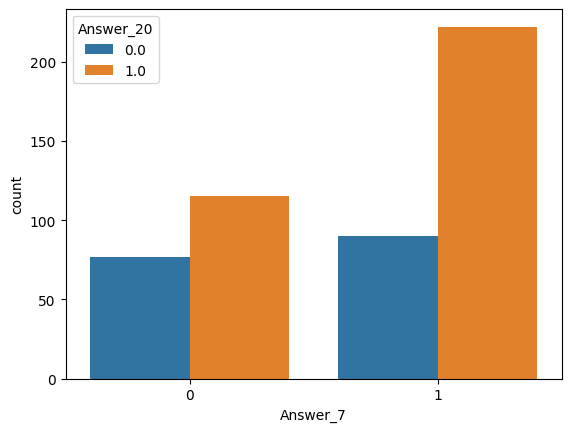

In [ ]:
sns.countplot(data=df, x='Answer_7', hue='Answer_20')
plt.show()

Es lógico que se tenga más cobertura médica (relacionadas con salud mental) en gente que ya ha buscado tratamiento para enfermedades mentales. Sin embargo, aún hay aprox 100 personas que han buscado tratamiento pero no cuentan con cobertura médica.
La mayoría tiene cobertura médica.

In [ ]:
#QuestionID=33: Do you currently have a mental health disorder?
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==33
"""
cursor.execute(query)
cursor.fetchall()

[('No',), ('Yes',), ('Maybe',), ('Possibly',), ("Don't Know",)]

In [ ]:
query = """SELECT
    Answer_7,
    Answer_33
FROM (
    SELECT
        UserID,
        MAX(CASE WHEN QuestionID = 7 THEN CAST(AnswerText AS INTEGER) ELSE NULL END) AS Answer_7,
        MAX(CASE WHEN QuestionID = 33 THEN AnswerText ELSE NULL END) AS Answer_33
    FROM Answer
    WHERE QuestionID IN (7, 33)
    GROUP BY UserID
) AS Subquery
ORDER BY Answer_33
"""
cursor.execute(query)
df = pd.read_sql_query(query,con)
df

,Answer_7,Answer_33
0,1,None
1,0,None
2,0,None
3,1,None
4,0,None
...,...,...
4213,1,Yes
4214,1,Yes
4215,1,Yes
4216,1,Yes


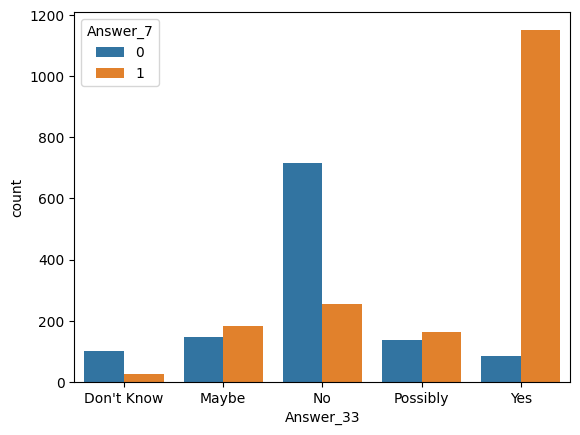

In [ ]:
sns.countplot(data=df, x='Answer_33', hue='Answer_7')
plt.show()

Bastante gente que ha tratado una enfermedad mental aún la sigue teniendo.

## 15) Relación entre edad y si tuvo empleadores anteriormente

In [ ]:
#QuestionID=22 : Do you have previous employers?
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==22
"""
cursor.execute(query)
cursor.fetchall()

[('1',), ('0',)]

In [ ]:
query = """SELECT UserID, Answer_1,
          Answer_22
          FROM (
          SELECT
          UserID,
          MAX(CASE WHEN QuestionID = 1 THEN CAST(AnswerText AS INTEGER) ELSE NULL END) AS Answer_1,
        MAX(CASE WHEN QuestionID = 22 THEN AnswerText ELSE NULL END) AS Answer_22
    FROM Answer
    WHERE QuestionID IN (1, 22)
    GROUP BY UserID
) AS Subquery
"""
df = pd.read_sql_query(query,con)
df

,UserID,Answer_1,Answer_22
0,1,37.0,None
1,2,44.0,None
2,3,32.0,None
3,4,31.0,None
4,5,31.0,None
...,...,...,...
4208,4214,27.0,1
4209,4215,48.0,1
4210,4216,50.0,0
4211,4217,30.0,1


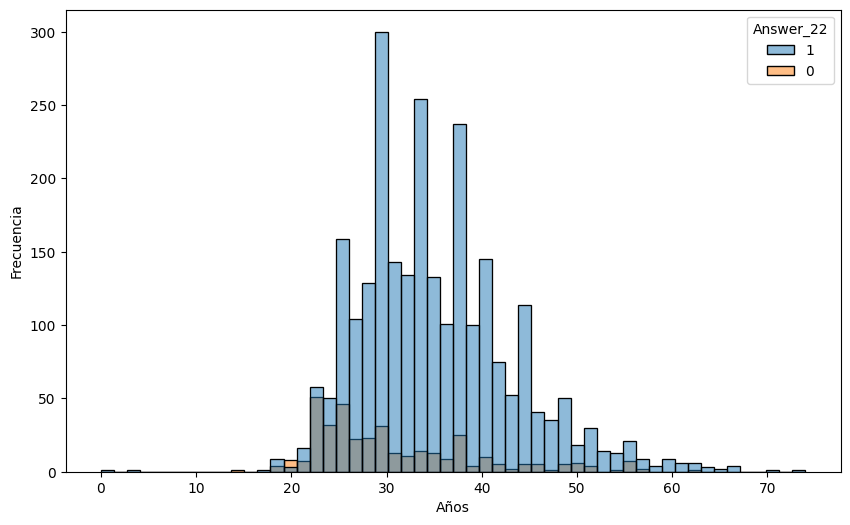

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Answer_1' , hue='Answer_22')
plt.ylabel('Frecuencia')
plt.xlabel('Años')
plt.show()

## 16) Encontrar a la persona más joven que cumpla las siguientes condiciones: <br>
*   Vive en Estados Unidos
*   Trabaja remoto


In [ ]:
#QuestionID=3: What country do you live in?
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==3
"""
cursor.execute(query)
cursor.fetchall()

[('United States',),
 ('Canada',),
 ('United Kingdom',),
 ('Bulgaria',),
 ('France',),
 ('Portugal',),
 ('Netherlands',),
 ('Switzerland',),
 ('Poland',),
 ('Australia',),
 ('Germany',),
 ('Russia',),
 ('Mexico',),
 ('Brazil',),
 ('Slovenia',),
 ('Costa Rica',),
 ('Austria',),
 ('Ireland',),
 ('India',),
 ('South Africa',),
 ('Italy',),
 ('Sweden',),
 ('Colombia',),
 ('Latvia',),
 ('Romania',),
 ('Belgium',),
 ('New Zealand',),
 ('Zimbabwe',),
 ('Spain',),
 ('Finland',),
 ('Uruguay',),
 ('Israel',),
 ('Bosnia and Herzegovina',),
 ('Hungary',),
 ('Singapore',),
 ('Japan',),
 ('Nigeria',),
 ('Croatia',),
 ('Norway',),
 ('Thailand',),
 ('Denmark',),
 ('Bahamas, The',),
 ('Greece',),
 ('Moldova',),
 ('Georgia',),
 ('China',),
 ('Czech Republic',),
 ('Philippines',),
 ('United States of America',),
 ('Lithuania',),
 ('Venezuela',),
 ('Argentina',),
 ('Vietnam',),
 ('Slovakia',),
 ('Bangladesh',),
 ('Algeria',),
 ('Pakistan',),
 ('Afghanistan',),
 ('Other',),
 ('Brunei',),
 ('Iran',),
 ('Ecu

In [ ]:
#QuestionID=118: Do you work remotely?
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==118
"""
cursor.execute(query)
cursor.fetchall()

[('Sometimes',), ('Never',), ('Always',)]

In [ ]:
query = """SELECT UserID, Answer_1
FROM (
    SELECT
        UserID,
        MAX(CASE WHEN QuestionID = 1 THEN CAST(AnswerText AS INT) ELSE NULL END) AS Answer_1,
        MAX(CASE WHEN QuestionID = 3 THEN AnswerText ELSE NULL END) AS Answer_3,
        MAX(CASE WHEN QuestionID = 118 THEN AnswerText ELSE NULL END) AS Answer_118
    FROM Answer
    WHERE QuestionID IN (1,3,118)
    GROUP BY UserID
) AS Subquery
where Answer_3 IN ('United States','United States of America') and (Answer_118 IN ('Always','Sometimes')) and (Answer_1 != 'NULL')
ORDER BY Answer_1 asc
Limit 1
"""
df = pd.read_sql_query(query,con)
df

,UserID,Answer_1
0,1997,19


19 años tiene la persona más chica que trabaja en remoto y vive en Estados Unidos

## 17) Considerar la cantidad de respuestas positivas a la pregunta ¿alguna vez fue diagnosticada la persona con una enfermedad mental? y evaluar si hay congruencia con las preguntas ¿actualmente la persona tiene una enfermedad mental? y ¿ha tenido en el pasado la persona una enfermedad mental?

In [ ]:
#questionid = 34 : ¿alguna vez fue diagnosticada la persona con una enfermedad mental?
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==34
"""
cursor.execute(query)
cursor.fetchall()

[('Yes',), ('No',)]

In [ ]:
#questionid = 33 : ¿actualmente la persona tiene una enfermedad mental?
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==33
"""
cursor.execute(query)
cursor.fetchall()

[('No',), ('Yes',), ('Maybe',), ('Possibly',), ("Don't Know",)]

In [ ]:
#questionid = 32 ¿ha tenido en el pasado la persona una enfermedad mental?
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==32
"""
cursor.execute(query)
cursor.fetchall()

[('Yes',), ('Maybe',), ('No',), ('Possibly',), ("Don't Know",)]

In [ ]:
query = """SELECT SUM(CASE WHEN QuestionID=34 and AnswerText == 'Yes' THEN 1 ELSE 0 END),
SUM(CASE WHEN QuestionID=33 and AnswerText == 'Yes' THEN 1 ELSE 0 END),
SUM(CASE WHEN QuestionID=32 and AnswerText == 'Yes' THEN 1 ELSE 0 END)  FROM Answer
"""
cursor.execute(query)
cursor.fetchall()

[(1363, 1237, 1417)]

1363 respondieron 'Sí' a la pregunta 34, 1237 respondieron 'Sí' a la pregunta 33 y 1417 respondieron 'Sí' a la pregunta 32. Denota que las personas no fueron diagnosticadas y que más creen haber tenido una enfermedad mental.

## 18) Agrupar las personas por cantidad de preguntas que respondieron y considerar las que tienen más de 10.

In [ ]:
query = """SELECT UserID, COUNT(QuestionID)  FROM Answer
GROUP BY UserID
ORDER BY COUNT(QuestionID) DESC
"""
cursor.execute(query)
df = pd.read_sql_query(query,con)
df

,UserID,COUNT(QuestionID)
0,4068,67
1,4071,66
2,3711,66
3,3414,66
4,2786,66
...,...,...
4213,12,23
4214,10,23
4215,8,23
4216,4,23


El máximo de preguntas respondidas por una persona es 67 y el mínimo es 23.

In [ ]:
query = """SELECT UserID, COUNT(QuestionID) AS QuestionCount  FROM Answer
GROUP BY UserID
HAVING QuestionCount >= 66
ORDER BY QuestionCount DESC;
"""
cursor.execute(query)
df = pd.read_sql_query(query,con)
df

,UserID,QuestionCount
0,4068,67
1,4071,66
2,3711,66
3,3414,66
4,2786,66
5,2740,66


## 19) Quedarse con las personas que más se involucran con la salud mental en el trabajo mediante puntaje, el puntaje se obtiene de la siguiente forma: <br>
1 punto si se responde Sí a la questionid = 12 <br>
1 punto si se responde Sí a la questionid = 14 <br>
1 punto si se responde Sí a la questionid = 21 <br>
1 punto si se responde Sí a la questionid = 62 <br>
2 puntos si se responde NO a la questionid = 108 <br>
2 puntos si se responde NO a la questionid = 109 <br>
-2 puntos si se responde lo contrario a los anteriores puntos en al menos 3 preguntas


In [ ]:
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==12
"""
cursor.execute(query)
cursor.fetchall()

[('No',), ('Yes',), ('Maybe',)]

In [ ]:
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==14
"""
cursor.execute(query)
cursor.fetchall()

[('Yes',), ('I am not sure',), ('No',)]

In [ ]:
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==21
"""
cursor.execute(query)
cursor.fetchall()

[('Yes, I know several',), ('I know some',), ("No, I don't know any",)]

In [ ]:
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==62
"""
cursor.execute(query)
cursor.fetchall()

[('1',), ('0',)]

In [ ]:
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==108
"""
cursor.execute(query)
cursor.fetchall()

[('Some of them',),
 ('None of them',),
 ("I don't know",),
 ('Yes, all of them',)]

In [ ]:
query = """SELECT DISTINCT AnswerText FROM Answer
where QuestionID==109
"""
cursor.execute(query)
cursor.fetchall()

[('None of them',), ('Some of them',), ('Yes, all of them',)]

In [ ]:
query = """SELECT UserID, CASE WHEN Puntaje_Valor_1+Puntaje_Valor_2 <= 3 THEN Puntaje_Valor_1+2*Puntaje_Valor_2-2
            ELSE Puntaje_Valor_1+2*Puntaje_Valor_2 END AS Puntaje
            FROM (SELECT UserID, SUM(CASE
            WHEN QuestionID=12 and AnswerText == 'Yes' THEN 1
            WHEN QuestionID=14 and AnswerText == 'Yes' THEN 1
            WHEN QuestionID=21 and AnswerText == 'Yes, I know several' THEN 1
            WHEN QuestionID=62 and AnswerText == 1 THEN 1
            ELSE 0 END) as Puntaje_Valor_1,
            SUM(CASE
            WHEN QuestionID=108 and AnswerText == 'None of them' THEN 1
            WHEN QuestionID=109 and AnswerText == 'None of them' THEN 1
            ELSE 0 END) as Puntaje_Valor_2 FROM Answer
            Group by UserID) AS Subquery
            Order by Puntaje DESC
"""

df = pd.read_sql_query(query,con)
df

,UserID,Puntaje
0,1411,6
1,1481,6
2,1496,6
3,1749,6
4,1980,6
...,...,...
4213,4213,-2
4214,4214,-2
4215,4215,-2
4216,4216,-2
